<img src="https://ucfai.org/groups/supplementary/sp20/02-06-stats-intro/stats-intro/banner.png">

<div class="col-12">
    <span class="btn btn-success btn-block">
        Meeting in-person? Have you signed in?
    </span>
</div>

<div class="col-12">
    <h1> Introduction to Statistics, Featuring Datascience </h1>
    <hr>
</div>

<div style="line-height: 2em;">
    <p>by: 
        <strong> None</strong>
        (<a href="https://github.com/calvinyong">@calvinyong</a>)
    
        <strong> None</strong>
        (<a href="https://github.com/jordanstarkey95">@jordanstarkey95</a>)
     on 2020-02-06</p>
</div>

## Purpose

The goal of this workshop is to provide the essential statistical knowledge required for data science.

To demonstrate these essentials, we'll look at a 

This workshop assumes you have reviewed the supplementary [Python3 workshop](https://ucfai.org/supplementary/sp20/math-primer-python-bootcamp) and core [Linear Regression workshop](https://ucfai.org/core/sp20/linear-regression).

## Introduction

Lets look at how statistical methods are used in an applied machine learning project:

* Problem Framing: Requires the use of exploratory data analysis and data mining.
* Data Understanding: Requires the use of summary statistics and data visualization.
* Data Cleaning: Requires the use of outlier detection, imputation and more.
* Data Selection: Requires the use of data sampling and feature selection methods.
* Data Preparation: Requires the use of data transforms, scaling, encoding and much more.
* Model Evaluation: Requires experimental design and resampling methods.
* Model Configuration: Requires the use of statistical hypothesis tests and estimation statistics.
* Model Selection: Requires the use of statistical hypothesis tests and estimation statistics.
* Model Presentation: Requires the use of estimation statistics such as confidence intervals.
* Model Predictions: Requires the use of estimation statistics such as prediction intervals

[Source: https://machinelearningmastery.com/statistics_for_machine_learning/]

## Descriptive and Inferential Statistics

**Descriptive statistics** identify patterns in the data, but they don't allow for making hypotheses about the data.

Within descriptive statistics, there are three measures used to describe the data: *central tendency* and *deviation*. 

* Central tendency tells you about the centers of the data. Useful measures include the mean, median, and mode.
* Variability tells you about the spread of the data. Useful measures include variance and standard deviation.
* Correlation or joint variability tells you about the relation between a pair of variables in a dataset. Useful measures include covariance and the correlation coefficient.

**Inferential statistics** allow us to make hypotheses (or inferences) about a sample that can be applied to the population. 

In statistics, the **population** is a set of all elements or items that you’re interested in. Populations are often vast, which makes them inappropriate for collecting and analyzing data. That’s why statisticians usually try to make some conclusions about a population by choosing and examining a representative subset of that population.

This subset of a population is called a **sample**. Ideally, the sample should preserve the essential statistical features of the population to a satisfactory extent. That way, you’ll be able to use the sample to glean conclusions about the population.




In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
## Load the Boston dataset into a variable called boston
boston = load_boston()

In [0]:
## Separate the features from the target
x = boston.data
y = boston.target

To view the dataset in a standard tabular format with the all the feature names, you will convert this into a pandas dataframe.

In [0]:
## Take the columns separately in a variable
columns = boston.feature_names

## Create the Pandas dataframe from the sklearn dataset
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns

## Descriptive Statistics

This portion serves as a very basic primer on Descriptive statistics and will explain concepts which are fundamental to understanding Inferential Statistics, its tools and techniques. We will be using Boston House Price dataset: 

https://www.kaggle.com/c/boston-housing

Here is the Dataset description: 

* crim
 * per capita crime rate by town.

* zn
 * proportion of residential land zoned for lots over 25,000 sq.ft.

* indus
 * proportion of non-retail business acres per town.

* chas
 * Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox
 * nitrogen oxides concentration (parts per 10 million).

* rm
 * average number of rooms per dwelling.

* age
 * proportion of owner-occupied units built prior to 1940.

* dis
 * weighted mean of distances to five Boston employment centres.

* rad
 * index of accessibility to radial highways.

* tax
 * full-value property-tax rate per \$10,000.

* ptratio
 * pupil-teacher ratio by town.

* black
 * 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* lstat
 * lower status of the population (percent).

* medv
 * median value of owner-occupied homes in \$1000s.



### Summary Statistics

To begin learning about the sample, we uses pandas' `describe` method, as seen below. The column headers in bold text represent the variables we will be exploring. Each row header represents a descriptive statistic about the corresponding column.

In [0]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


`describe` isnt particularly enlightening on the distributions of our data 
but can help use figure out how to approach our visualization techniques. Before we explore essential graphs for exploring our data, lets use a few more important pandas methods to aid in our exploratory data analysis task.

In [0]:
print ("Rows     : " , boston_df.shape[0])
print ("Columns  : " , boston_df.shape[1])
print ("\nFeatures : \n" , boston_df.columns.tolist())
print ("\nMissing values :  ", boston_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",boston_df.nunique())
print('\n')
print(boston_df.head())

Rows     :  506
Columns  :  13

Features : 
 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

Missing values :   0

Unique values :  
 CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64


      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


We first show the shape of our dataset. We have 506 rows for our 13 features (columns). This is a relatively nice dataset in that there arent many missing values. A future supplementary lecture in preprocessing will cover techniques in dealing with missing values. 
We can see that there is a feature (CHAS) which has 2 unique values. This could indicate that it is a catgeorical variables. There are three types of statistical data we may be dealing with: 

* Numerical (Quantitative) data have meaning as a measurement, such as a person’s height, weight, IQ, or blood pressure; or they’re a count, such as the number of stock shares a person owns or how many teeth a dog has. Numerical data can be further broken into two types: discrete and continuous.

 * Discrete data represent items that can be counted; they take on possible values that can be listed out. The list of possible values may be fixed (also called finite); or it may go from 0, 1, 2, on to infinity (making it countably infinite). For example, the number of heads in 100 coin flips takes on values from 0 through 100 (finite case), but the number of flips needed to get 100 heads takes on values from 100 (the fastest scenario) on up to infinity (if you never get to that 100th heads).  

 * Continuous data represent measurements; their possible values cannot be counted and can only be described using intervals on the real number line. For example, the exact amount of gas purchased at the pump for cars with 20-gallon tanks would be continuous data from 0 gallons to 20 gallons, represented by the interval [0, 20], inclusive. Continuous data can be thought of as being uncountably infinite. 

* Categorical (Qualitative) data represent characteristics such as a person’s gender, marital status, hometown, or the types of movies they like. Categorical data can take on numerical values (such as “1” indicating married and “2” indicating unmarried), but those numbers don’t have mathematical meaning. The process of giving these mathematical meaning for our model to understand is variable encoding. This will be covered in the preprocessing supplementary lecture.

* Ordinal data mixes numerical and categorical data. The data fall into categories, but the numbers placed on the categories have meaning. For example, rating a restaurant on a scale from 0 (lowest) to 4 (highest) stars gives ordinal data. Ordinal data are often treated as categorical, where the groups are ordered when graphs and charts are made. However, unlike categorical data, the numbers do have mathematical meaning. For example, if you survey 100 people and ask them to rate a restaurant on a scale from 0 to 4, taking the average of the 100 responses will have meaning. This would not be the case with categorical data.

### Central Tendencies

The central tendencies are values which represent the central or 'typical' value of the given distribution. The three most popular central tendency estimates are the mean, median and mode. Typically, in most cases, we resort to using mean (for normal distributions) and median (for skewed distributions) to report central tendency values.

A good rule of thumb is to use mean when outliers don't affect its value and median when it does (Bill Gates joke, anyone?).

Calculating the mean and median are extremely trivial with Pandas. In the following cell, we have calculated the mean and median of the average number of rooms per dwelling.  As we can see below, the mean and the median are almost equal.

In [0]:
rooms = boston_df['RM']
rooms.mean(), rooms.median()

(6.284634387351787, 6.2085)

If the mean, median and the mode of a set of numbers are equal, it means, the distribution is symmetric. The more skewed is the distribution, greater is the difference between the median and mean, and we should lay greater emphasis on using the median as opposed to the mean

### Measures of Spread

Apart from the central or typical value of the data, we are also interested in knowing how much the data spreads. That is, how far from the mean do values tend to go. Statistics equips us with two measures to quantitatively represent the spread: the variance and the standard deviation. They are dependent quantities, with the standard deviation being defined as the square root of variance.

In [0]:
rooms.std(), rooms.var()

(0.7026171434153237, 0.4936708502211095)

The mean and the standard deviation are often the best quantities to summarize the data for distributions with symmetrical histograms without too many outliers. As we can see from the histogram below, this indeed is the case for RM feature. Therefore, the mean and the standard deviation measures are sufficient information and other tendencies such as the median does not add too much of extra information.

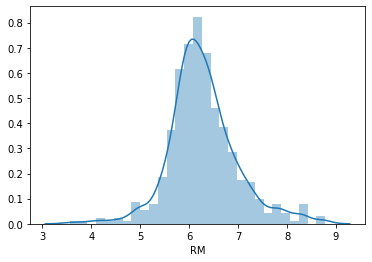

In [0]:
sns.distplot(rooms)

This is an example of a normal (Gaussian) distribution. It is ideal that our continuous variables folllow this distribution because of the central limit theorem. See [here](https://towardsdatascience.com/why-data-scientists-love-gaussian-6e7a7b726859) for an explanation on why the Gaussian is ideal for machine learning models.

In [0]:
stats.normaltest(rooms)

NormaltestResult(statistic=37.89574305099423, pvalue=5.90260814347777e-09)

`normaltest` returns a 2-tuple of the chi-squared statistic, and the associated p-value. Given the null hypothesis that x came from a normal distribution, the p-value represents the probability that a chi-squared statistic that large (or larger) would be seen. If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

Here is an example of a skewed dsitribution and how to fix it in order to fit a normal distribution.


28.072042765119424 67.38433734939758


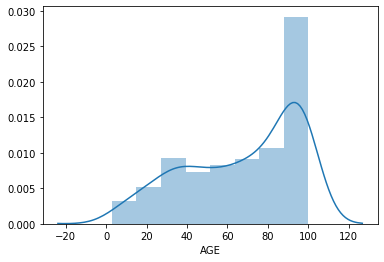

In [0]:
age = boston_df['AGE']
print(age.std(), age.mean())
sns.distplot(age)

There are many ways to transform skewed data in order to fit a normal distribution. This will transform the data into a normal distribution. Moreover, you can also try Box-Cox transformation which calculates the best power transformation of the data that reduces skewness although a simpler approach which can work in most cases would be applying the natural logarithm. More details about Box-Cox transformation can be found here and here

0.6225646449674217 4.0690897314054


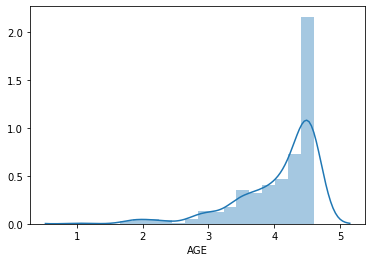

In [0]:
log_age = np.log(age)
print(log_age.std(), log_age.mean())
sns.distplot(log_age)

Although there is a long left tail, the log transformation reduces the deviation of the data. Can we measure normalcy? Yes! Rather than read from a Histogram, we can perform the Normal Test. This comes in the Scipy package and that lets us calculate the probability that the distrbution is normal, by chance.

### Univariate Analysis

It is a common practice to start with univariate outlier analysis where you consider just one feature at a time. Often, a simple box-plot of a particular feature can give you good starting point. You will make a box-plot using `seaborn` and you will use the `DIS` feature.

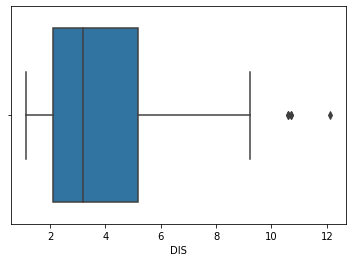

In [0]:
sns.boxplot(x=boston_df['DIS'])
plt.show()

 A box-and-whisker plot is helpful for visualizing the distribution of the data from the mean. Understanding the distribution allows us to understand how far spread out her data is from the mean. Check out [how to read and use a Box-and-Whisker plot](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/).


The above plot shows three points between 10 to 12, these are **outliers** as they're are not included in the box of other observations. Here you analyzed univariate outlier, i.e., you used DIS feature only to check for the outliers.

An outlier is considered an observation that appears to deviate from other observations in the sample. We can spot outliers in plots like this or scatterplots.

Many machine learning algorithms are sensitive to the range and distribution of attribute values in the input data. Outliers in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times and less accurate models.

A more robust way of statistically identifying outliers is by using the Z-Score.

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. [*Source definition*](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/).

The idea behind Z-score is to describe any data point regarding their relationship with the Standard Deviation and Mean for the group of data points. Z-score is about finding the distribution of data where the mean is 0, and the standard deviation is 1, i.e., normal distribution.

In [0]:
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [0]:
threshold = 3
## The first array contains the list of row numbers and the second array contains their respective column numbers.
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

You could use Z-Score and set its threshold to detect potential outliers in the data. With this, we can remove the outliers from our dataframe. For example:

In [0]:
print(boston_df.shape)
boston_df = boston_df[(np.abs(stats.zscore(boston_df)) < 3).all(axis=1)]
print(boston_df.shape)

(506, 13)
(415, 13)


For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
all(axis=1) ensures that for each row, all column satisfy the constraint.
Finally, result of this condition is used to index the dataframe.

## References 

* https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781784390150/2

* https://www.learndatasci.com/tutorials/data-science-statistics-using-python/

* https://www.datacamp.com/community/tutorials/demystifying-crucial-statistics-python

